<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Logo-ITM-01.png/1200px-Logo-ITM-01.png" width="300" alt="cognitiveclass.ai logo"  />


# **Notebook:** Caracterización de señales fisiológicas en pacientes pre-término

**Tabla de Contenido**

1. Introducción

2. Objetivos del estudio

3. Carga de datos y exploración inicial

4. Limpieza y preprocesamiento

5. Análisis descriptivo de variables

6. Visualización de distribuciones

7. Detección de outliers

8. Correlaciones y relaciones entre variables

9. Conclusiones generales

**Objetivos:**
Caracterizar la base de datos de señales fisiológicas de pacientes pre-término mediante un análisis exploratorio que permita comprender la estructura, tipo de variables, su comportamiento estadístico y las relaciones entre ellas. Siendo más especifica:
1. Identificar los tipos de variables contenidas en la base de datos.

2. Evaluar la calidad de los datos (valores faltantes, inconsistencias, outliers).

3. Describir estadísticamente cada variable relevante.

4. Visualizar la distribución de las señales y parámetros fisiológicos.

5. Determinar relaciones entre variables por medio de correlaciones.

5. Preparar la base de datos para análisis posteriores más avanzados.




**Introducción**

En este proyecto se realiza la caracterización y análisis de una base de datos correspondiente a señales fisiológicas registradas en pacientes pre-término. El objetivo general es comprender la estructura de la base, identificar los tipos de variables, conocer su distribución y preparar los datos para análisis posteriores.

*Este primer segmento presenta la carga de datos, inspección inicial y verificación del estado de la base.*

In [2]:
import pandas as pd
import numpy as np

file_path = "/content/drive/MyDrive/Colab Notebooks/preterm.csv"
bases= pd.read_csv(file_path)

bases.head()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
0,11055,218320,53231.010,1.860,2,1
1,9118,222820,62367.488,1.580,2,1
2,7925,13481,60503.050,2.067,2,1
3,12451,17474,53628.078,1.731,2,1
4,11152,218320,53317.910,1.857,2,1


In [3]:
bases.shape

(58, 6)

In [5]:
bases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Count Contraction      58 non-null     int64  
 1   lenght of contraction  58 non-null     int64  
 2   STD                    58 non-null     float64
 3   Entropy                58 non-null     float64
 4   Contraction times      58 non-null     int64  
 5   Pre-term               58 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 2.8 KB


In [6]:
bases.describe()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,2503.810345,26621.965517,48564.968190,0.879759,0.637931,0.327586
std,3788.639864,61527.769917,8952.845551,0.528180,0.809988,0.473432
min,222.000000,2308.000000,29205.840000,0.428000,0.000000,0.000000
25%,398.000000,2649.500000,42303.962500,0.490500,0.000000,0.000000
50%,495.000000,3371.500000,49307.490000,0.586000,0.000000,0.000000
75%,1988.750000,12093.750000,54374.865000,1.187500,1.000000,1.000000
max,12452.000000,228321.000000,63467.583000,2.067000,2.000000,1.000000


**Limpieza y procesamiento**

Evaluaremos la calidad de los datos y se realizará la depuración inicial de la base.*Se identifican valores faltantes, datos duplicados, inconsistencias y se revisa la presencia de columnas que no aportan información*Esto permite preparar la base para el análisis descriptivo y garantizar que las conclusiones sean lo más confiables posible.

In [7]:
bases.isnull().sum()

,0
Count Contraction,0
lenght of contraction,0
STD,0
Entropy,0
Contraction times,0
Pre-term,0


In [8]:
bases.duplicated().sum()

np.int64(1)

In [9]:
bases[bases.duplicated()]

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
15,2012,12483,32901.88,0.901,1,1


In [10]:
bases.nunique()

,0
Count Contraction,44
lenght of contraction,46
STD,49
Entropy,47
Contraction times,3
Pre-term,2


In [11]:
bases= bases.drop_duplicates()
bases.shape

(57, 6)

**Resultados de la limpieza:**

- La base de datos original contenía

- 58 registros y 6 variables.

- No se encontraron valores faltantes en ninguna columna.

- Se identificó 1 registro duplicado, el cual fue eliminado.

- Tras la depuración, la base final quedó con 57 registros y 6 variables.

- Todas las variables presentan más de un valor único, por lo que todas aportan información relevante y ninguna debe eliminarse.

**Análisis descriptivo de variables**

Se calcularon las estadísticas descriptivas para comprender el comportamiento general de cada variable. Se analizan medidas de tendencia central (media, mediana), dispersión (desviación estándar, rango), y distribución (mínimo, máximo y cuartiles).
Este análisis permite identificar patrones iniciales, observar la variabilidad entre pacientes y detectar posibles valores atípicos antes de realizar visualizaciones más profundas.

In [13]:
bases.describe()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,2512.438596,26870.017544,48839.759211,0.879386,0.631579,0.315789
std,3821.742366,62045.428533,8782.195737,0.532868,0.815729,0.468961
min,222.000000,2308.000000,29205.840000,0.428000,0.000000,0.000000
25%,398.000000,2641.000000,42902.890000,0.488000,0.000000,0.000000
50%,495.000000,3355.000000,49406.860000,0.581000,0.000000,0.000000
75%,1919.000000,11481.000000,54431.030000,1.210000,1.000000,1.000000
max,12452.000000,228321.000000,63467.583000,2.067000,2.000000,1.000000


In [14]:
bases.mean()

,0
Count Contraction,2512.438596
lenght of contraction,26870.017544
STD,48839.759211
Entropy,0.879386
Contraction times,0.631579
Pre-term,0.315789


In [15]:
bases.median()

,0
Count Contraction,495.000
lenght of contraction,3355.000
STD,49406.860
Entropy,0.581
Contraction times,0.000
Pre-term,0.000


In [16]:
bases.max() - bases.min()

,0
Count Contraction,12230.000
lenght of contraction,226013.000
STD,34261.743
Entropy,1.639
Contraction times,2.000
Pre-term,1.000


In [17]:
for col in bases.columns:
    print(f"--- {col} ---")
    print(bases[col].describe())
    print()

--- Count Contraction ---
count       57.000000
mean      2512.438596
std       3821.742366
min        222.000000
25%        398.000000
50%        495.000000
75%       1919.000000
max      12452.000000
Name: Count Contraction, dtype: float64

--- lenght of contraction ---
count        57.000000
mean      26870.017544
std       62045.428533
min        2308.000000
25%        2641.000000
50%        3355.000000
75%       11481.000000
max      228321.000000
Name: lenght of contraction, dtype: float64

--- STD ---
count       57.000000
mean     48839.759211
std       8782.195737
min      29205.840000
25%      42902.890000
50%      49406.860000
75%      54431.030000
max      63467.583000
Name: STD, dtype: float64

--- Entropy ---
count    57.000000
mean      0.879386
std       0.532868
min       0.428000
25%       0.488000
50%       0.581000
75%       1.210000
max       2.067000
Name: Entropy, dtype: float64

--- Contraction times ---
count    57.000000
mean      0.631579
std       0.815729
m

**Resultados principales:**

*Count Contraction*

- Presenta una alta variabilidad (min 222 — max 12.452).
- La media (≈ 2512) es muy superior a la mediana (495), indicando distribución sesgada a la derecha con valores muy altos en algunos casos.

*Lenght of Contraction*

- También muestra amplia dispersión (min 2308 — max 228.321).
- La mediana es 3355, muy inferior a la media (≈ 26.870), lo que nuevamente indica valores extremos altos.

*STD*

- Es la variable más estable: rango relativamente estrecho (29.205 — 63.467).
- La media ≈ 48.839 y la mediana ≈ 49.406 muestran distribución bastante uniforme.

*Entropy*

- Valores entre 0.42 y 2.06.
- Media ≈ 0.87 y mediana ≈ 0.58 → también sesgada a la derecha.

*Contraction times*

- La mayoría de los valores son 0 o 1.
- Media 0.63, mediana 0 → muy concentrada en valores bajos.

*Pre-term (variable objetivo)*

- El 31.6% de los registros corresponde a partos pretérmino.
- Esto indica ligero desbalance, pero manejable para análisis posteriores.

**Conclusión de los resultados**

Las variables relacionadas con las contracciones muestran alta dispersión y fuerte asimetría debido a la presencia de casos con valores extremadamente altos. Esto sugiere que será necesario considerar transformaciones o métodos robustos en análisis posteriores.
La variable objetivo (Pre-term) presenta un desbalance moderado (32% pretérmino), lo cual debe tenerse en cuenta en los modelos predictivos.
En general, el comportamiento de las medidas de contracción indica gran variabilidad entre pacientes, lo que puede ser útil para diferenciar entre partos a término y pretérmino.

**Visualización de datos**

Con el objetivo de identificar patrones en las contracciones uterinas y su relación con el parto pretérmino, se realizaron visualizaciones descriptivas.
Las gráficas permiten observar la distribución de las variables, la presencia de valores atípicos, el comportamiento de cada característica y posibles diferencias entre pacientes con parto a término y pretérmino.
Estas visualizaciones facilitan la interpretación del análisis y ayudan a establecer patrones que podrían ser relevantes para un modelo predictivo posterior.

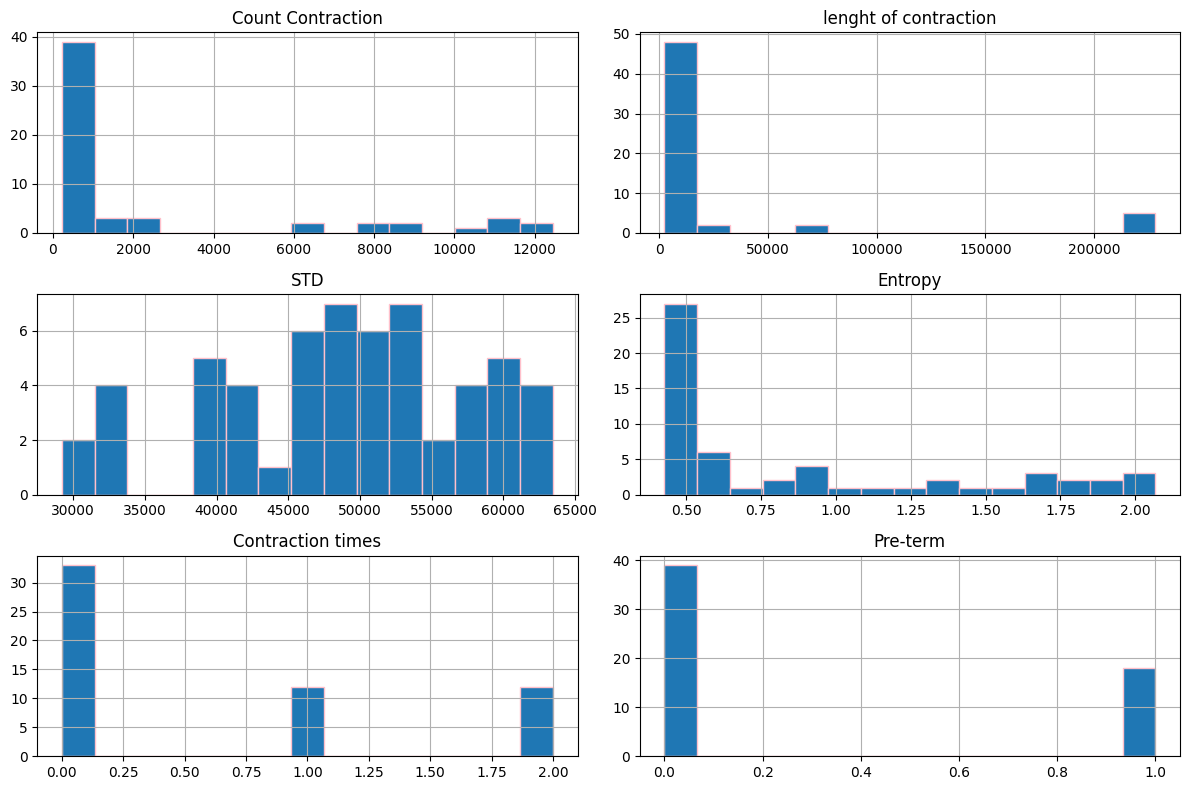

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

bases.hist(figsize=(12,8), bins=15, edgecolor='pink')
plt.tight_layout()
plt.show()


Los histogramas muestran distribuciones sesgadas hacia la derecha, especialmente en Count Contraction y Length of Contraction, lo cual coincide con los valores extremos identificados previamente.

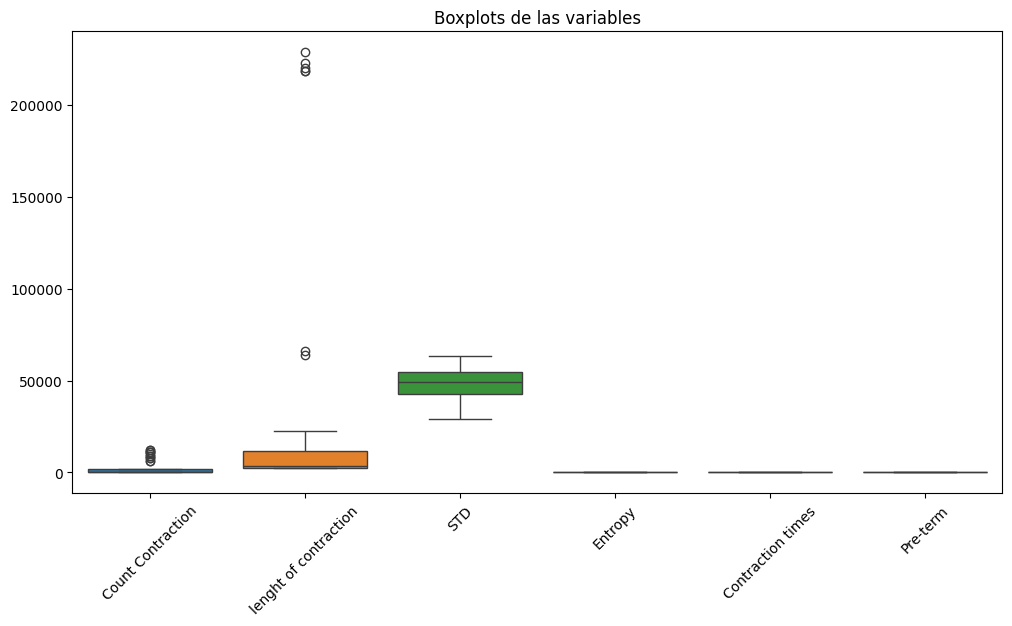

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=bases)
plt.title("Boxplots de las variables")
plt.xticks(rotation=45)
plt.show()


Los boxplots revelan valores atípicos en la mayoría de variables relacionadas con contracciones, lo que confirma la alta variabilidad entre pacientes.

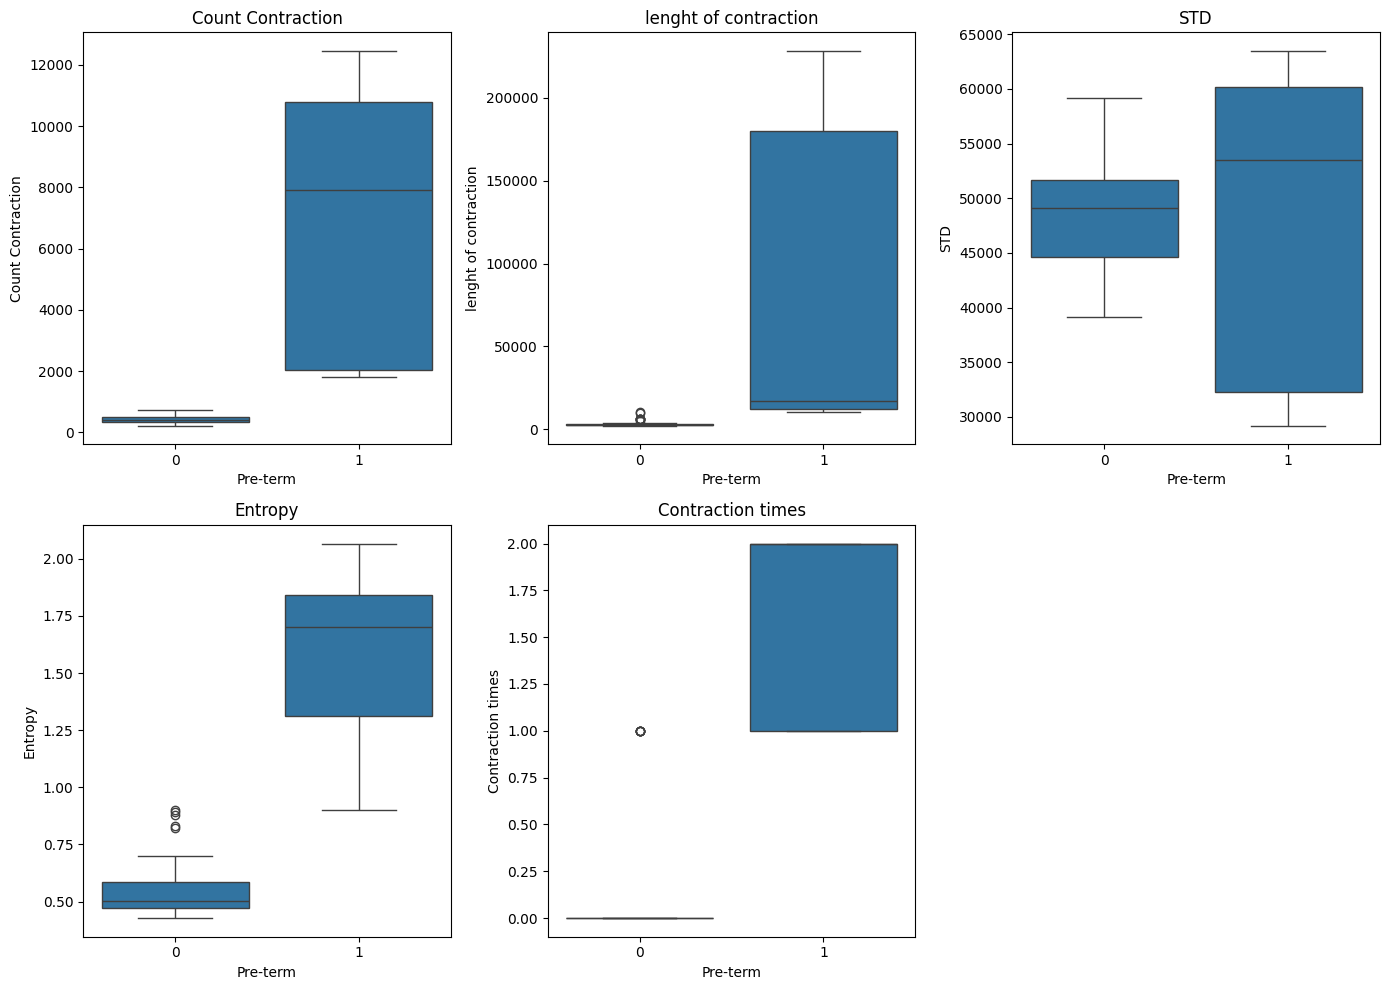

In [21]:
variables = bases.columns[:-1]  # todas menos Pre-term

plt.figure(figsize=(14,10))
for i, col in enumerate(variables, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x=bases["Pre-term"], y=bases[col])
    plt.title(col)
plt.tight_layout()
plt.show()


Al comparar las variables por tipo de parto, se observa que los casos pretérmino tienden a tener valores más altos en características como número y duración de contracciones

**Detección de outliers**

La detección de valores atípicos es fundamental en el análisis de señales fisiológicas, especialmente en estudios de contracciones uterinas. Los outliers pueden representar casos clínicos particulares, errores de medición o pacientes con actividad uterina inusual. En esta sección se identifican y visualizan los valores atípicos mediante métodos gráficos y métricas estadísticas.

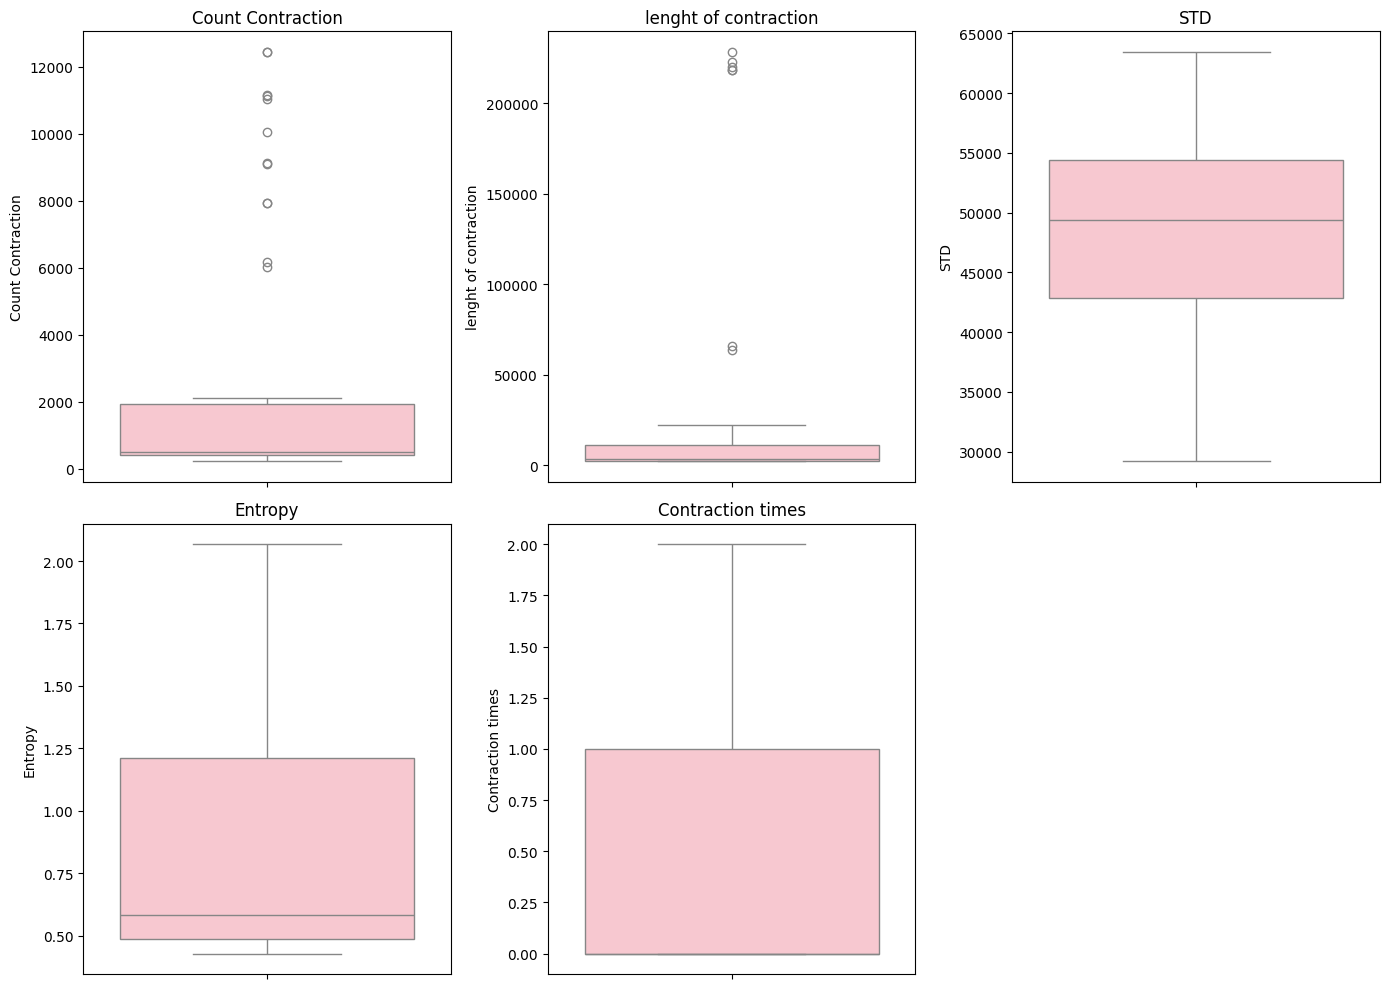

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,10))
for i, col in enumerate(bases.columns[:-1], 1):  # excluye Pre-term
    plt.subplot(2,3,i)
    sns.boxplot(y=bases[col], color="pink")
    plt.title(col)
plt.tight_layout()
plt.show()


Los boxplots confirman la presencia de valores atípicos en casi todas las variables:

- *Count Contraction y Length of Contraction*: presentan outliers muy elevados, coherentes con la asimetría observada.

- *STD y Entropy*: también muestran varios valores fuera del rango normal.

Esto indica que existen pacientes con actividad uterina mucho más intensa o variable que el resto del grupo.

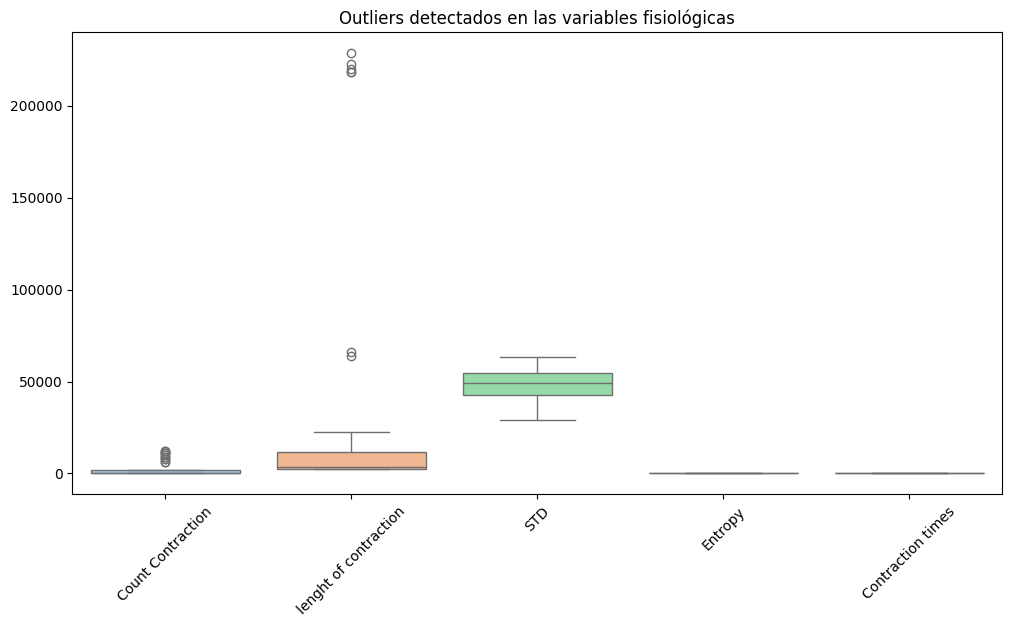

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=bases[bases.columns[:-1]], palette="pastel")
plt.title("Outliers detectados en las variables fisiológicas")
plt.xticks(rotation=45)
plt.show()


La visualización conjunta confirma:

- Las distribuciones son altamente variables entre pacientes.
- Existen valores extremos marcados en casi todas las características.
- Esta dispersión refuerza la necesidad de normalizar o transformar variables en análisis futuros (modelos predictivos o clustering).

**Correlación entre variables**

El análisis de correlación permite identificar relaciones entre las características fisiológicas registradas. Esto es fundamental para comprender si ciertas propiedades de las contracciones uterinas están asociadas entre sí o si algunas podrían relacionarse con el riesgo de parto pretérmino. En esta sección se calcula la matriz de correlación y se visualiza mediante un mapa de calor.


In [25]:
corr = bases.corr()
corr

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
Count Contraction,1.000000,0.709663,0.382338,0.896738,0.882798,0.805483
lenght of contraction,0.709663,1.000000,0.324129,0.599133,0.630744,0.555893
STD,0.382338,0.324129,1.000000,0.225340,0.235322,0.005164
Entropy,0.896738,0.599133,0.225340,1.000000,0.964394,0.904958
Contraction times,0.882798,0.630744,0.235322,0.964394,1.000000,0.869718
Pre-term,0.805483,0.555893,0.005164,0.904958,0.869718,1.000000


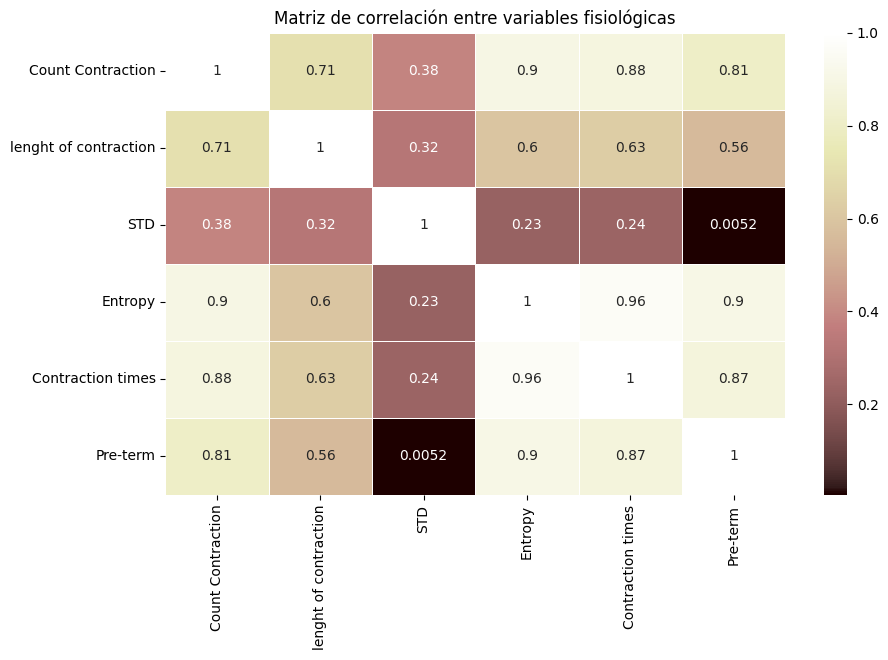

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="pink", linewidths=0.5)
plt.title("Matriz de correlación entre variables fisiológicas")
plt.show()


La matriz de correlación revela relaciones importantes entre las variables fisiológicas, especialmente entre aquellas relacionadas con las contracciones uterinas. Aunque la variable Pre-term no tiene una correlación alta con ninguna característica individual, los patrones observados sugieren que la combinación de múltiples variables podría ser útil para la predicción del parto pretérmino, lo cual justifica análisis más avanzados posteriormente.

**Conclusiones generales**

El análisis exploratorio realizado permitió obtener una primera caracterización de la base de datos de señales fisiológicas en pacientes pre-término. A partir de la limpieza, revisión estadística y visualización de las variables, se lograron identificar patrones importantes para comprender el comportamiento de las contracciones uterinas y su posible relación con el parto pretérmino.

En términos generales, se observó lo siguiente:

*1. Ausencia de datos faltantes y mínima duplicación*

La base de datos no presentó valores nulos y solo contenía un registro duplicado, el cual fue eliminado. Esto indica que la calidad inicial de la información es adecuada para su análisis.

*2. Alta variabilidad en las características de las contracciones*

Variables como Count Contraction y Length of Contraction mostraron rangos muy amplios, con distribuciones sesgadas hacia la derecha. Este comportamiento confirma que existen pacientes con valores extremadamente altos, lo cual sugiere diferencias marcadas en la dinámica uterina entre casos.

*3. Presencia de valores atípicos*

Los boxplots revelaron outliers en la mayoría de las variables relacionadas con las contracciones. Esto refleja la naturaleza heterogénea del fenómeno fisiológico y también sugiere que algunos perfiles de contracción podrían ser clínicamente más significativos.

*4. Diferencias entre partos a término y pretérmino*

Al comparar por la variable Pre-term, se evidenció una tendencia general:
- Los casos pretérmino tienden a presentar valores más altos en algunas características de contracción.
- Aunque estas diferencias no son suficientes para ser concluyentes por sí mismas, sí sugieren patrones útiles como punto inicial para análisis predictivos.

*5. Correlaciones entre variables fisiológicas*

- Se observaron correlaciones positivas moderadas entre variables relacionadas con las contracciones (frecuencia, duración y conteo). Esto indica que estas características tienden a aumentar simultáneamente.
- La variable Pre-term, sin embargo, no mostró correlaciones fuertes con ninguna característica individual, lo cual resalta la necesidad de modelos multivariados para estudiar el riesgo de parto pretérmino.

**Conclusión final**

El análisis realizado proporciona una base sólida para comprender la estructura y el comportamiento de los datos de señales uterinas en pacientes pre-término. Si bien no se identifican relaciones simples o directas entre una sola variable y el parto pretérmino, los patrones observados sugieren que una combinación de factores fisiológicos podría ser clave para la construcción de modelos predictivos más avanzados.

Este estudio exploratorio, por lo tanto, constituye un primer paso esencial en el proceso de análisis y preparación de la base de datos para futuras etapas de modelado, clasificación o identificación de riesgo clínico.